In [1]:
import pandas as pd
import glob
import nltk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Fetching metaData files

metaData = pd.read_csv('ReasearchProjectData/ecco_tcp-metadata.csv', error_bad_lines=False, low_memory=False)
perPage = pd.read_csv('ReasearchProjectData/per_page_df_ecco_conf.csv', error_bad_lines=False)

In [3]:
#Fetching all the text files

difference = []
path = 'ReasearchProjectData/by_page_csv/'
folders = [f for f in glob.glob(path + "**/*.csv", recursive=True)]

In [10]:
results = None
for f in folders:
    difference.append(baseFunction(f))
results = get_errors(difference)

In [4]:
def baseFunction(f):
    diffe = []
    perPageText = pd.read_csv(f, error_bad_lines=False)
    perPageText = perPageText.sort_values(['page'])
    
    tokens_ocr = fetch_tokens(perPageText.ocr)
    tokens_tcp = fetch_tokens(perPageText.tcp)
    
    token_ocr_count = get_token_length(tokens_ocr)
    token_tcp_count = get_token_length(tokens_tcp)
    
    diffe.append(get_token_diff(token_ocr_count, token_tcp_count))
    return diffe

In [5]:
def fetch_tokens(textPage):
    tokens = []
    i = 0
    while i < len(textPage):
        tokens.append(nltk.RegexpTokenizer(r'\w+').tokenize(textPage[i]))
        i += 1
    return tokens

In [6]:
def get_token_length(tokens):
    token_length = []
    j = 0
    while j < len(tokens):
        token_length.append(len(tokens[j]))
        j += 1
    token_length = np.array(token_length)
    return token_length

In [7]:
def get_token_diff(count_ocr, count_tcp):
    diff = []
    if (count_ocr.size == count_tcp.size):
        diff.append([abs(a - b) > 10 for a,b in zip(count_ocr, count_tcp)])
    return diff

In [8]:
def get_errors(difference):
    errors = []
    coef = np.array(difference).ravel()
    for diff in coef:
        errors.append([sum(diff), len(diff)])
    return errors

In [11]:
len(results)

2386

In [12]:
accuracy = len(results)

In [13]:
print(results[0])

[33, 335]


In [20]:
lst2 = [result[0]/result[1]*100 for result in results]

In [21]:
ocred = [result[0] for result in results]
actual = [result[1] for result in results]

In [22]:
lst2

[9.850746268656717,
 8.059701492537313,
 61.93771626297578,
 80.0,
 3.278688524590164,
 37.5,
 15.384615384615385,
 21.403508771929825,
 20.408163265306122,
 6.976744186046512,
 25.0,
 11.46788990825688,
 19.35483870967742,
 11.940298507462686,
 22.99854439592431,
 1.694915254237288,
 1.884057971014493,
 16.299559471365637,
 1.293103448275862,
 2.6178010471204187,
 8.880308880308881,
 7.30593607305936,
 46.56084656084656,
 11.200000000000001,
 7.216494845360824,
 13.970588235294118,
 43.58974358974359,
 9.523809523809524,
 23.52941176470588,
 6.666666666666667,
 3.984819734345351,
 9.140767824497258,
 19.838056680161944,
 7.011070110701106,
 4.285714285714286,
 41.935483870967744,
 40.67278287461774,
 9.782608695652174,
 5.128205128205128,
 50.208333333333336,
 45.596868884540115,
 50.68181818181819,
 44.988344988344984,
 3.4482758620689653,
 8.754208754208754,
 23.076923076923077,
 9.75609756097561,
 28.749999999999996,
 7.4074074074074066,
 9.090909090909092,
 16.0,
 5.19480519480519

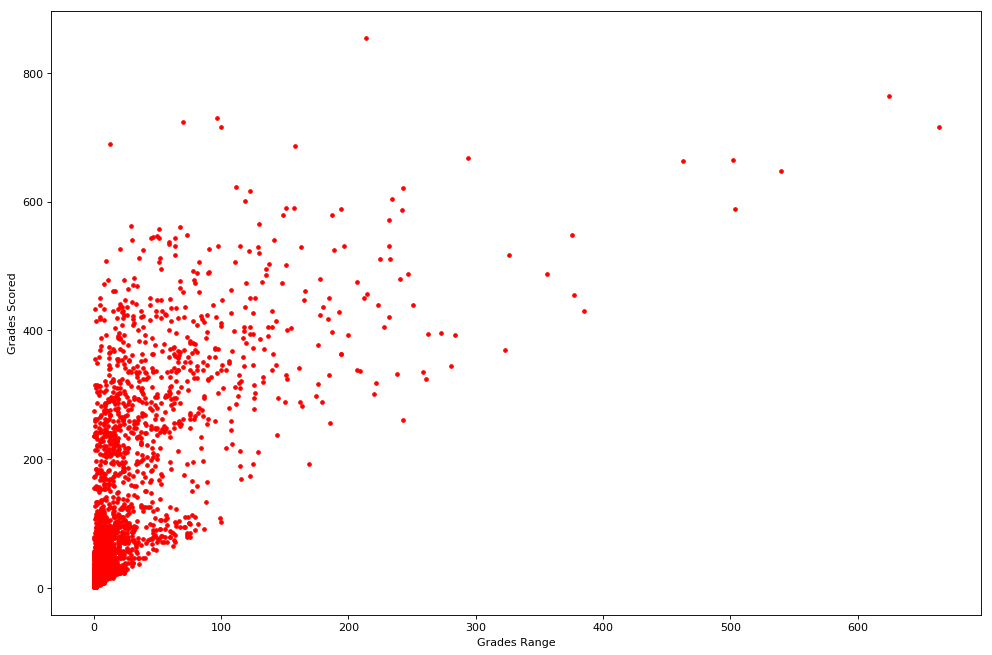

In [17]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(ocred, actual, s=10, color='r')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()

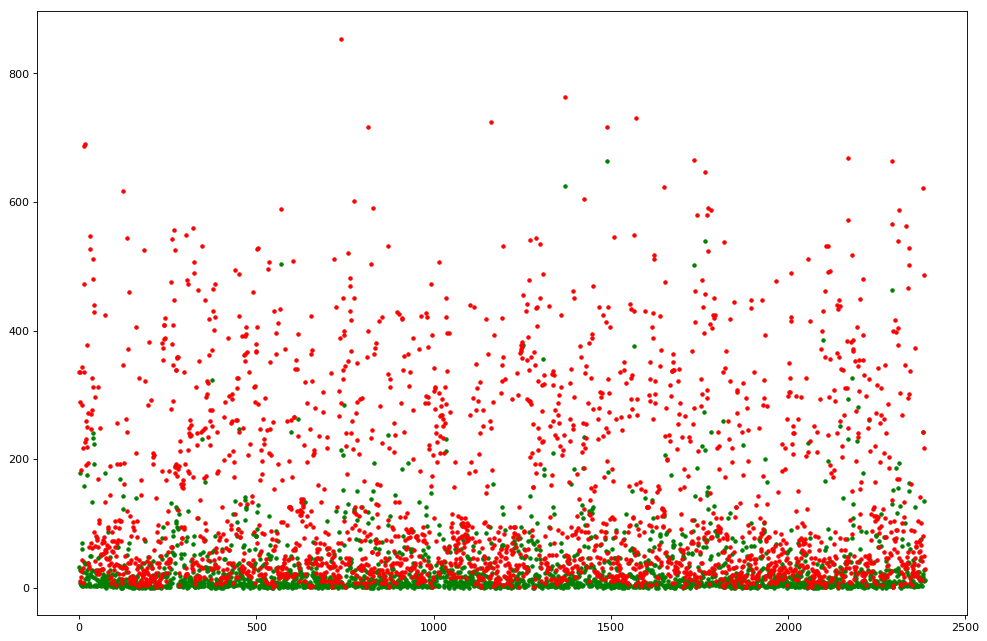

In [18]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ocred,'g*', actual, 'ro', marker='.')
plt.show()

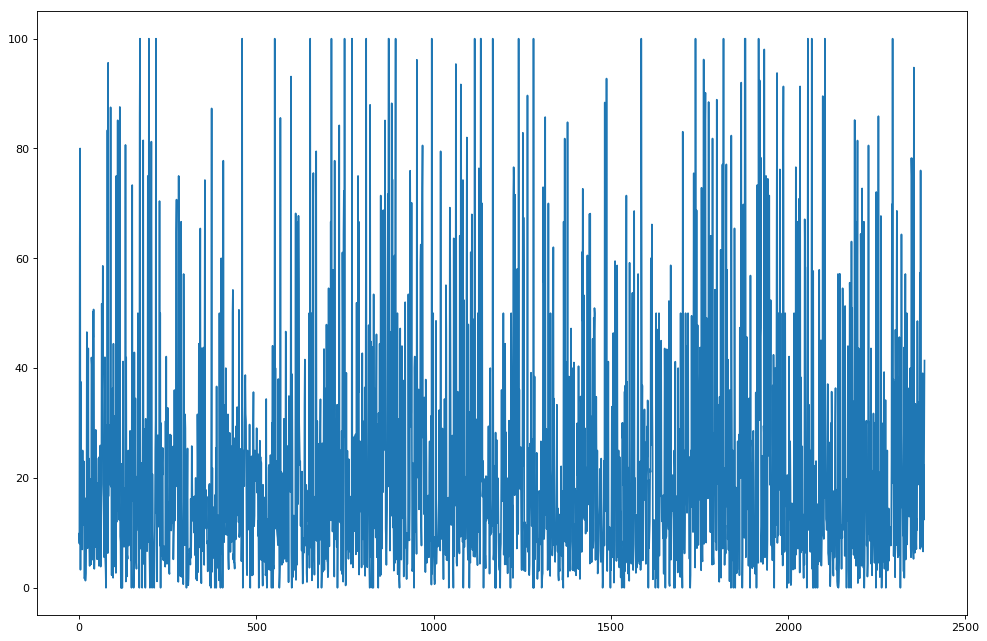

In [23]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lst2)
plt.show()

In [61]:
results = None